In [2]:
# For Basic Operations
import numpy as np
import pandas as pd

# for Datetime Manipulation
import datetime

# For Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for Interactive Analysis
from ipywidgets import interact

In [3]:
# lets read the  'movies.csv' Dataset
data = pd.read_csv('movie.csv')

# lets check the shape of the dataset
data.shape

(9125, 3)

In [3]:
# lets check the head of the dataset
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# lets also read the ratings dataset
rating = pd.read_csv('ratings.csv')

# lets check the shape also
rating.shape

(100836, 4)

In [5]:
# lets check the head of the rating data
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
# As we are going to Perform the Content Based Filtering
# lets merge the rating data with the movie data
data = pd.merge(data, rating, on = 'movieId', how = 'inner')

# lets check the shape of the Merged Dataset
data.shape

(96811, 6)

In [7]:
# Lets check the Head of the Merged Dataset
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091


In [7]:
# As we do not Require the MovieId, UserId and Timestamp lets remove them
data = data.drop(['movieId', 'userId', 'timestamp'], axis = 1)

# lets check the head of the Final Dataset
data.head()

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5


In [8]:
# Now, We Have to Groupby the Dataset Based on the Movie Title

data = pd.pivot_table(data, index = ['title','genres'], aggfunc = 'mean')
data.reset_index(level=['title','genres'], inplace = True)
data.head()

,title,genres,rating
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
1,'Round Midnight (1986),Drama|Musical,3.500000
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
3,'Til There Was You (1997),Drama|Romance,4.000000
4,"'burbs, The (1989)",Comedy,3.176471


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


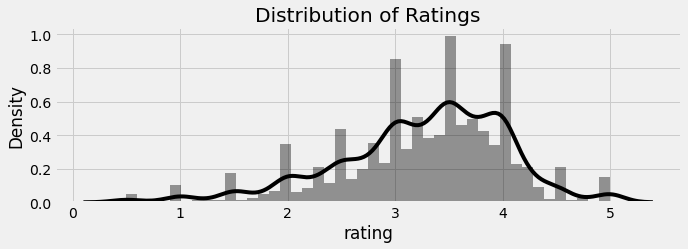

In [9]:
# lets check the Distribution of Ratings across the Movies

plt.rcParams['figure.figsize'] = (10, 3)
plt.style.use('fivethirtyeight')
sns.distplot(data['rating'], color = 'black')
plt.title('Distribution of Ratings')
plt.show()

In [11]:
# Lets Extract Year of Release from the Movie Title
data['y'] = data['title'].str.split(' ')
data['year'] = data['y'].apply(lambda x: x[-1])

# lets drop the unnecessary 'y' column from the dataset
data = data.drop(['y'], axis = 1)

# lets remove the Opening and Closing Brackets from the String
data['year'] = data['year'].str.strip(')')
data['year'] = data['year'].str.strip('(')

# lets check the Values After Extraction
pd.set_option('max_rows', 110)
data['year'].value_counts()

1996         274
2002         272
1998         272
2000         272
1997         267
2001         267
1995         266
1999         261
2006         259
2009         255
2007         254
2008         247
2004         247
1994         240
2003         237
2005         233
2011         227
2010         227
2013         220
2012         219
2014         216
1993         198
2015         173
1988         164
1987         152
1992         149
1989         147
1990         142
1991         137
1986         129
1985         125
1982         102
1984          99
1981          99
1980          97
1983          81
1979          72
1978          62
1977          61
2016          59
1974          57
1971          54
1967          52
1976          51
1973          51
1975          49
1955          49
1972          48
1966          48
1963          47
1964          45
1968          45
1960          45
1965          42
1970          42
1962          41
1959          40
1957          40
1969          

In [12]:
# There are some Dirty Values, Let's Clean them
data['year'] = data['year'].replace(('2007-','Despot','Things', '1975-1979','Road', ''),
                                   ('2007','2016','2016','1979','2002','1996'))

# lets convert the year column into Integer data type to remove it later via 'split()' 
data['year'] = data['year'].astype(int)

# lets check the head of the dataset again
data.head()

,title,genres,rating,year
0,"""Great Performances"" Cats (1998)",Musical,1.750000,1998
1,$9.99 (2008),Animation,3.833333,2008
2,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,2.000000,2004
3,'Neath the Arizona Skies (1934),Western,0.500000,1934
4,'Round Midnight (1986),Drama|Musical,2.250000,1986


In [13]:
# lets remove the Year from the Movie Titles
data['title'] = data['title'].str.split(' ')
data['title'] = data['title'].apply(lambda x: ' '.join(x[:-1]))


# lets check the head of the dataset again
data.head()

,title,genres,rating,year
0,"""Great Performances"" Cats",Musical,1.750000,1998
1,$9.99,Animation,3.833333,2008
2,'Hellboy': The Seeds of Creation,Action|Adventure|Comedy|Documentary|Fantasy,2.000000,2004
3,'Neath the Arizona Skies,Western,0.500000,1934
4,'Round Midnight,Drama|Musical,2.250000,1986
